In [1]:
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler


bkg = np.zeros((150,400))
bkg[:] = np.nan

# load data

In [2]:
# load data
file_72 = '/data/lipidatlas/REBUTTAL/WEBSITE/processed72_anatomical.h5ad'
file_48 = '/data/lipidatlas/REBUTTAL/WEBSITE/processed48.h5ad'
file_24 = '/data/lipidatlas/REBUTTAL/WEBSITE/processed24.h5ad'
file_8 = '/data/lipidatlas/REBUTTAL/WEBSITE/processed8.h5ad'
adata72 = ad.read_h5ad(file_72)
adata48 = ad.read_h5ad(file_48)
adata24 = ad.read_h5ad(file_24)
adata8 = ad.read_h5ad(file_8)


# linking anatomical notation

In [4]:
# load the annatomical annotations
df_annotation = pd.read_excel('/data/lipidatlas/annotations/Supplementary_Table1.xlsx')[['Estimated_mz', 'Named_lipid']]


annotations = {}
timepoints = [8, 24,48,72]
for it, adata in enumerate([adata8,adata24 ,adata48,adata72]):
    selected_lipids = []
    
    indexes = []
    for im, mz in enumerate(adata.var.values.flatten()):
        dist = np.abs(float(mz) - df_annotation.Estimated_mz)
        if np.min(dist) < 0.008: # this is maximum error in Da we consider
            ix = np.argmin(dist) 
            selected_lipids.append(df_annotation.iloc[ix])
            indexes.append(im)
    selected_lipids = pd.DataFrame(selected_lipids, index=indexes)
    annotations[timepoints[it]] = selected_lipids
    

# visualising images

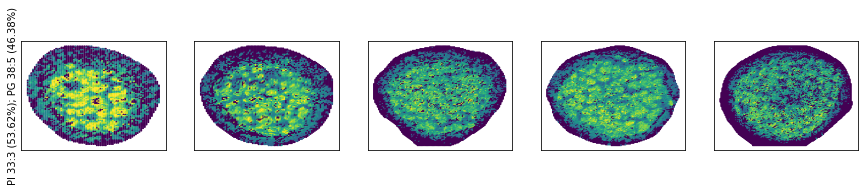

In [6]:
fig = plt.figure(None, (15,2))
gs = plt.GridSpec(1,5)

# select a specific section


ix_lipid = annotations[8].index[0]
for i_s, section in enumerate(np.unique(adata8.uns['x_coord'])[:5]):
    ix_section = adata8.uns['x_coord'] == section
    plt.subplot(gs[i_s])
    if i_s == 0:
        plt.ylabel(annotations[8].loc[ix_lipid].Named_lipid)
    plt.scatter(adata8.uns['z_coord'][ix_section], adata8.uns['y_coord'][ix_section], rasterized=True,
                c=adata8.X[ix_section,ix_lipid], s=1, vmin=0., vmax=0.6)
    


    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
plt.show()

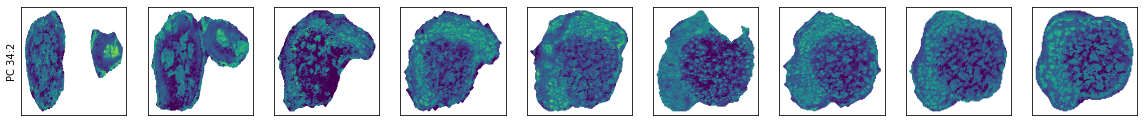

In [7]:
fig = plt.figure(None, (20,2))
gs = plt.GridSpec(1,9)

# select a specific section

ix_lipid = annotations[24].index[0]
for i_s, section in enumerate(np.unique(adata24.uns['x_coord'])[:9]):
    ix_section = adata24.uns['x_coord'] == section
    plt.subplot(gs[i_s])
    if i_s == 0:
        plt.ylabel(annotations[24].loc[ix_lipid].Named_lipid)
    plt.scatter(adata24.uns['z_coord'][ix_section], adata24.uns['y_coord'][ix_section], rasterized=True,
                c=adata24.X[ix_section,ix_lipid], s=1, vmin=0., vmax=1.)
    


    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
plt.show()

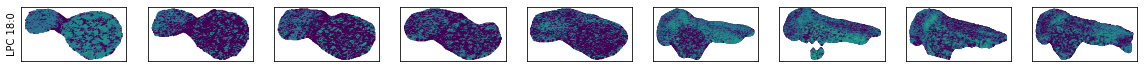

In [8]:
fig = plt.figure(None, (20,1))
gs = plt.GridSpec(1,9)



ix_lipid = annotations[48].index[0]
for i_s, section in enumerate(np.unique(adata48.uns['x_coord'])[:9]):
    ix_section = adata48.uns['x_coord'] == section
    plt.subplot(gs[i_s])
    if i_s == 0:
        plt.ylabel(annotations[48].loc[ix_lipid].Named_lipid)
    plt.scatter(adata48.uns['z_coord'][ix_section], adata48.uns['y_coord'][ix_section], rasterized=True,
                c=adata48.X[ix_section,ix_lipid], s=1, vmin=0., vmax=1.)
    


    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
plt.show()

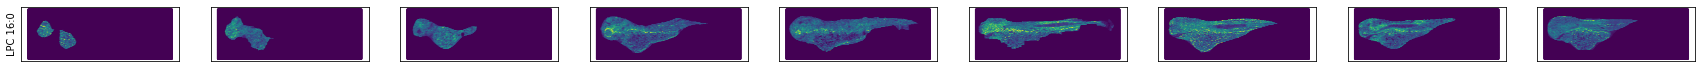

In [9]:
fig = plt.figure(None, (30,1))
gs = plt.GridSpec(1,9)



ix_lipid = annotations[72].index[0]
for i_s, section in enumerate(np.unique(adata72.uns['x_coord'])[4:13]):
    ix_section = adata72.uns['x_coord'] == section
    plt.subplot(gs[i_s])
    if i_s == 0:
        plt.ylabel(annotations[72].loc[ix_lipid].Named_lipid)
    plt.scatter(adata72.uns['z_coord'][ix_section], adata72.uns['y_coord'][ix_section], rasterized=True,
                c=adata72.X[ix_section,ix_lipid], s=1, vmin=0., vmax=0.02)
    


    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
plt.show()